In [243]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/cs_data.csv', encoding = 'utf-8', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [244]:
data.columns = [col.lower() for col in data.columns] # cokumns 소문자로 변경
data.head(2)

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime30-59dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime60-89dayspastduenotworse,numberofdependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [245]:
# IQR (Interquartile Range) 방법을 사용하여 이상치를 판별하는 알고리즘
# 데이터의 상위 25% (Q3)와 하위 25% (Q1) 지점 사이의 범위를 기준으로 이상치를 정의
def get_outlier(data, rate=1.5):
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    IOR = q3-q1
    return (data > q1-IOR * rate) & (data<q3+IOR * rate)

In [246]:
# 현재 운용할 수 있는 돈의 비율이 1보다 클 경우 이상치 이므로 1로 바꿔준다.
data.loc[data['revolvingutilizationofunsecuredlines'] >1, 'revolvingutilizationofunsecuredlines'] = 1
# revolvingutilizationofunsecuredlines 통계량 확인
data['revolvingutilizationofunsecuredlines'].describe()

count    150000.000000
mean          0.319196
std           0.349481
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max           1.000000
Name: revolvingutilizationofunsecuredlines, dtype: float64

In [247]:
data['age'].describe()
data['age'].value_counts().sort_index()

age
0        1
21     183
22     434
23     641
24     816
      ... 
102      3
103      3
105      1
107      1
109      2
Name: count, Length: 86, dtype: int64

In [248]:
data.drop(data.loc[data['age']==0].index, inplace=True)
data['age'].describe()

count    149999.000000
mean         52.295555
std          14.771298
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [249]:
# 최근 2년동안 30~59 일 연체한 횟수 
# 96, 98 은 2년동안 나올 수 없는 이상치 이므로 제거해준다
data['numberoftime30-59dayspastduenotworse'].value_counts()

numberoftime30-59dayspastduenotworse
0     126018
1      16032
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: count, dtype: int64

In [250]:
# drop하기
data.drop(data.loc[data['numberoftime30-59dayspastduenotworse'] > 90].index, inplace=True)
print(data['numberoftime30-59dayspastduenotworse'].value_counts())
print('=='*30)
print(data['numberoftime30-59dayspastduenotworse'].describe())

numberoftime30-59dayspastduenotworse
0     126018
1      16032
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
12         2
13         1
11         1
Name: count, dtype: int64
count    149730.000000
mean          0.245789
std           0.697779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: numberoftime30-59dayspastduenotworse, dtype: float64


In [251]:
# 소득 대비 부채비율(대출상환금+생활비/소득)
# 이상치가 아닌 값들 중 최대값으로 대체한다
data['debtratio'].describe()

count    149730.000000
mean        353.631316
std        2039.601344
min           0.000000
25%           0.175994
50%           0.367119
75%           0.870023
max      329664.000000
Name: debtratio, dtype: float64

In [252]:
# get_outlier 사용해 이상치 판별 -> 이상치 일 경우 False
# debtratio에서 True인 값만 선택
# np.max -> 선택된 값들 중 최대 값을 선택
max_value_dept = np.max(data.debtratio[get_outlier(data['debtratio'])])
print(max_value_dept)

1.909451946


In [253]:
# debtratio 값이 max_value_dept 보다 클 경우 max_value_dept 로 바꿔준다.
data.loc[data['debtratio'] > max_value_dept, 'debtratio'] = max_value_dept
data['debtratio'].describe()

count    149730.000000
mean          0.664386
std           0.688525
min           0.000000
25%           0.175994
50%           0.367119
75%           0.870023
max           1.909452
Name: debtratio, dtype: float64

In [254]:
data['monthlyincome'].describe()

count    1.201200e+05
mean     6.675295e+03
std      1.439255e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: monthlyincome, dtype: float64

In [255]:
data['monthlyincome']

1          9120.0
2          2600.0
3          3042.0
4          3300.0
5         63588.0
           ...   
149996     2100.0
149997     5584.0
149998        NaN
149999     5716.0
150000     8158.0
Name: monthlyincome, Length: 149730, dtype: float64

In [256]:
# 결측치를 제거 할 경우 데이터의 20퍼 정도를 손실을 보기 떄문에
# 이상치를 처리해야하기 떄문에 영향을 적게 주는 중앙 값으로 결측치를 바꿔준다
median_income = data['monthlyincome'].median()
data['monthlyincome'].fillna(median_income, inplace=True)
data['monthlyincome']
max_value_income = np.max(data.monthlyincome[get_outlier(data['monthlyincome'])])
max_value_income

np.float64(12626.0)

In [257]:
# 결측치 처리된 monthlyincome의 값의 이상치를 구한 후 바꿔준다.
max_value_income = np.max(data.monthlyincome[get_outlier(data['monthlyincome'])])
print(max_value_income)
data.loc[data['monthlyincome'] > max_value_income, 'monthlyincome'] = max_value_income
data['monthlyincome']

12626.0


1          9120.0
2          2600.0
3          3042.0
4          3300.0
5         12626.0
           ...   
149996     2100.0
149997     5584.0
149998     5400.0
149999     5716.0
150000     8158.0
Name: monthlyincome, Length: 149730, dtype: float64

In [258]:
data['monthlyincome'].describe()

count    149730.000000
mean       5879.828698
std        3042.497043
min           0.000000
25%        3915.000000
50%        5400.000000
75%        7400.000000
max       12626.000000
Name: monthlyincome, dtype: float64

In [259]:
# 데이터에 이상이 없으므로 그대로 사용
data['numberofopencreditlinesandloans'].value_counts().sort_index()

numberofopencreditlinesandloans
0      1621
1      4436
2      6666
3      9058
4     11609
5     12931
6     13613
7     13245
8     12562
9     11355
10     9624
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
37        7
38       13
39        9
40       10
41        4
42        8
43        8
44        2
45        8
46        3
47        2
48        6
49        4
50        2
51        2
52        3
53        1
54        4
56        2
57        2
58        1
Name: count, dtype: int64

In [237]:
# 과거 90 일 이상 연체 횟수
data['numberoftimes90dayslate'].describe()

count    149730.000000
mean          0.090456
std           0.485529
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: numberoftimes90dayslate, dtype: float64

In [239]:
# 이상이 없으므로 그대로 둔다.
data['numberoftimes90dayslate'].value_counts().sort_index()

numberoftimes90dayslate
0     141661
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
Name: count, dtype: int64

In [279]:
data['numberrealestateloansorlines'].value_counts().sort_index()

numberrealestateloansorlines
0     55919
1     52338
2     31521
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: count, dtype: int64

In [281]:
data.drop(data.loc[data['numberrealestateloansorlines']==54].index, inplace=True)

In [284]:
data['numberrealestateloansorlines'].value_counts().sort_index()

numberrealestateloansorlines
0     55919
1     52338
2     31521
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
Name: count, dtype: int64

In [291]:
data['numberoftime60-89dayspastduenotworse'].describe()

count    149729.000000
mean          0.064824
std           0.330075
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: numberoftime60-89dayspastduenotworse, dtype: float64

In [295]:
# 이상치 20 제거
data['numberofdependents'].value_counts().sort_index()

numberofdependents
0.0     86713
1.0     26293
2.0     19501
3.0      9479
4.0      2860
5.0       745
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: count, dtype: int64

In [297]:
data.drop(data.loc[data['numberofdependents']==20].index , inplace=True)
data['numberofdependents'].value_counts().sort_index()

numberofdependents
0.0     86713
1.0     26293
2.0     19501
3.0      9479
4.0      2860
5.0       745
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
Name: count, dtype: int64

In [298]:
data['numberofdependents'].describe()

count    145835.000000
mean          0.757719
std           1.114250
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          13.000000
Name: numberofdependents, dtype: float64

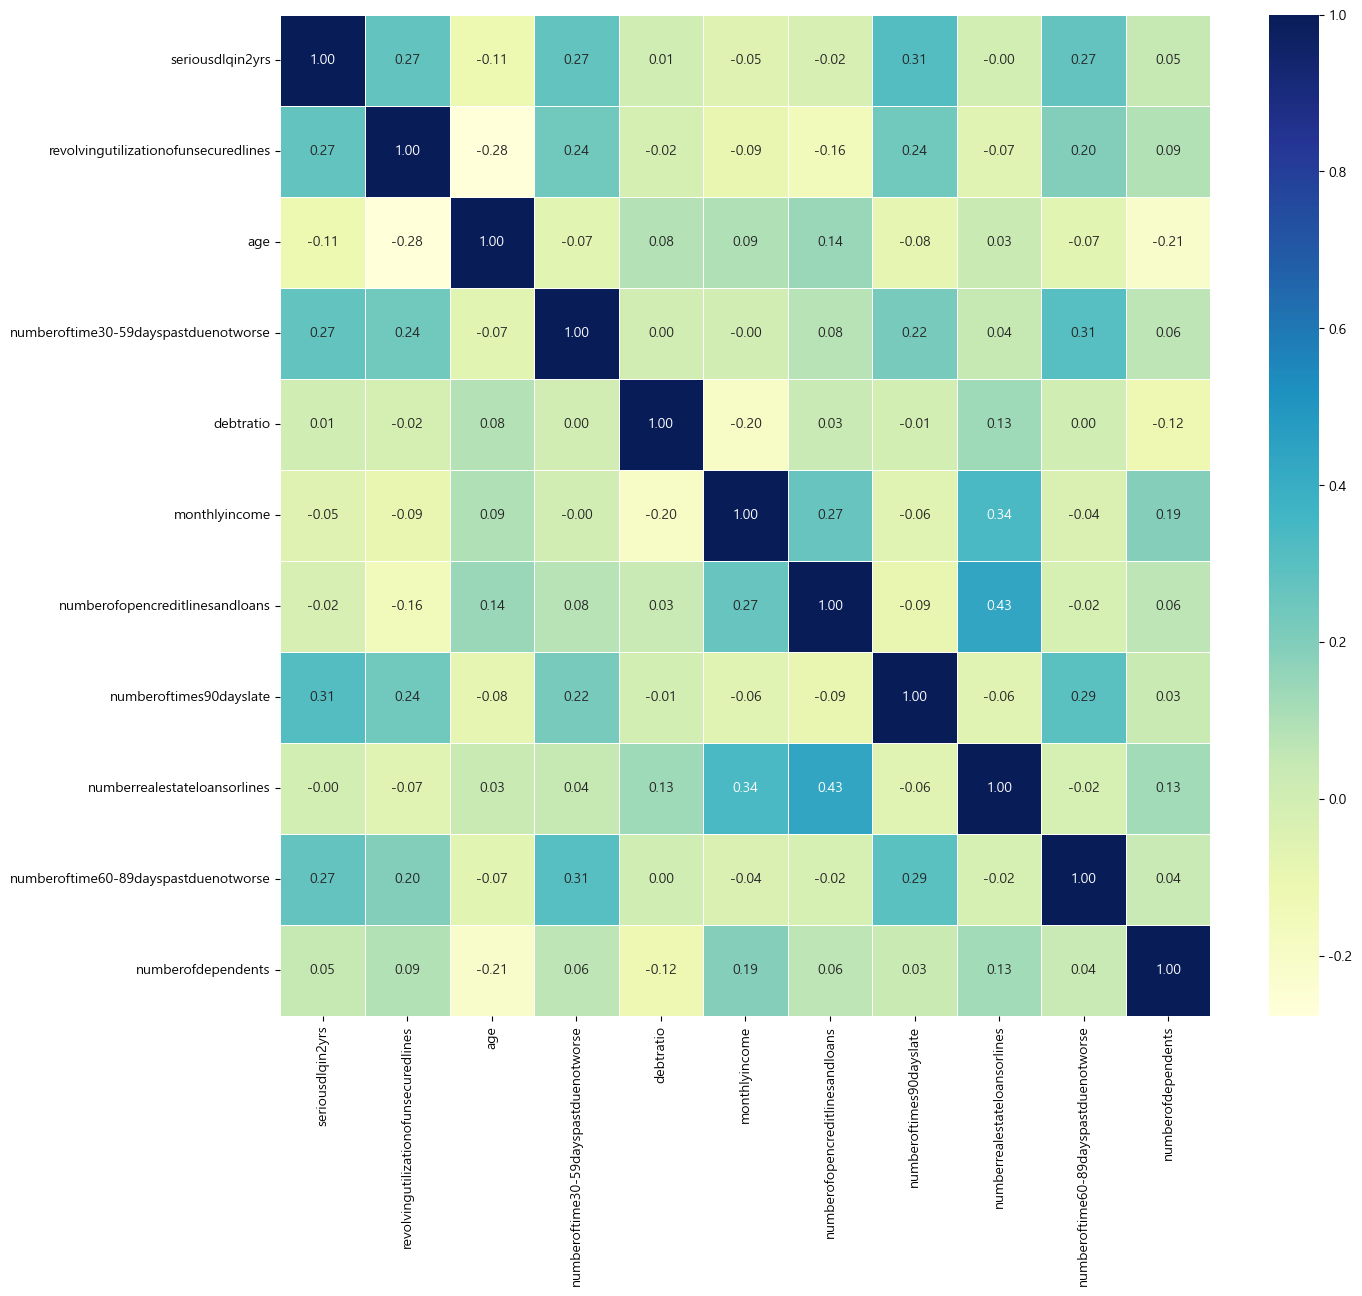

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,13))
ax = sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='YlGnBu')
# print(ax.get_ylim())
ax.set_ylim(11,0)
plt.show()